In [1]:
#ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#グラフの見た目変更
plt.style.use("ggplot")

#乱数のSeedを固定
np.random.seed(999)

In [2]:
#遷移核を定義 0:晴れ、1:曇り、2:雨
p_trans=np.zeros([3,3])
p_trans[0,0]=0.6
p_trans[0,1]=0.3
p_trans[0,2]=0.1
p_trans[1,0]=0.5
p_trans[1,1]=0.4
p_trans[1,2]=0.1
p_trans[2,0]=0.4
p_trans[2,1]=0.3
p_trans[2,2]=0.3

#モンテカルロステップ数
NMCS=100

#現在の天気(初期状態では晴れとする)
c_state=0

In [3]:
#遷移過程を保存しておくリスト
c_arr=[c_state]

#遷移を行う
for i in range(NMCS):
    current=np.random.choice(3,1,p=p_trans[c_state,:])
    c_state=current[0]
    c_arr.append(c_state)
    
print('晴れの確率：',c_arr.count(0)/len(c_arr))
print('曇りの確率：',c_arr.count(1)/len(c_arr))
print('雨の確率：',c_arr.count(2)/len(c_arr))

晴れの確率： 0.46534653465346537
曇りの確率： 0.36633663366336633
雨の確率： 0.16831683168316833


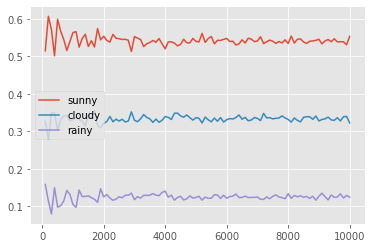

In [4]:
#モンテカルロステップ数のリスト
NMCS_list=np.arange(100,10000+1,100)

#晴れの確率を入れておくリスト
probability_list_0=[]
#曇りの確率を入れておくリスト
probability_list_1=[]
#雨の確率を入れておくリスト
probability_list_2=[]
for NMCS in NMCS_list:
    c_state=0
    c_arr=[c_state]
    for i in range(NMCS):
        current=np.random.choice(3,1,p=p_trans[c_state,:])
        c_state=current[0]
        c_arr.append(c_state)
    probability_list_0.append(c_arr.count(0)/len(c_arr))
    probability_list_1.append(c_arr.count(1)/len(c_arr))
    probability_list_2.append(c_arr.count(2)/len(c_arr))
    
plt.plot(NMCS_list,probability_list_0,label='sunny')
plt.plot(NMCS_list,probability_list_1,label='cloudy')
plt.plot(NMCS_list,probability_list_2,label='rainy')
plt.legend()
plt.savefig('./figure/fig_MarkovChain.jpg')
plt.show()